<a href="https://colab.research.google.com/github/troco-project/Veille-internationale-politiques-culturelles-des-diff-rents-pays-du-monde/blob/main/Festivals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Festivals de musique en France (1905-2022)

---



In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats
from scipy.stats import norm
!pip install missingno
import missingno as mno
import openpyxl as op
import matplotlib.pyplot as plt
%matplotlib inline

## - Lecture du fichier


In [ ]:
# URL du fichier CSV
url_csv = "https://www.data.gouv.fr/fr/datasets/r/47ac11c2-8a00-46a7-9fa8-9b802643f975"

# Lire le fichier CSV depuis l'URL
df = pd.read_csv(url_csv, delimiter=';', error_bad_lines=False)

# Afficher le tableau
df.head()

<ipython-input-79-e315416752ad>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url_csv, delimiter=';', error_bad_lines=False)


,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,...,sous_categorie_musique,sous_categorie_musique_cnm,sous_categorie_cinema_et_audiovisuel,sous_categorie_arts_visuels_et_arts_numeriques,sous_categorie_livre_et_litterature,periode_principale_de_deroulement_du_festival,identifiant_agence_a,identifiant,geocodage_xy,identifiant_cnm
0,Gamerz,Départementale,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,Aix-en-Provence,13090,13001,200054807,Métropole d'Aix-Marseille-Provence,1,...,NaN,NaN,NaN,Arts numériques,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_13001_49,"43.5360708378, 5.39857444582",NaN
1,Corsiclassic - festival de musique de chambre,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,Musique classique,NaN,NaN,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_2A004_85,"41.9347926638, 8.70132275974",NaN
2,Racines de ciel,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,50-52,...,NaN,NaN,NaN,NaN,"Fiction (roman, théâtre, etc.), Non-fiction (d...",Avant-saison (1er janvier - 20 juin),NaN,FEST_2A004_96,"41.9347926638, 8.70132275974",NaN
3,Le grand bivouac,Intercommunale,Auvergne-Rhône-Alpes,Savoie,Albertville,73200,73011,200068997,CA Arlysère,88 bis,...,NaN,NaN,Films documentaires courts et moyens métrages,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_73011_104,"45.6683987277, 6.40460338643",NaN
4,Festival Acthea,NaN,Occitanie,Tarn,Albi,81000,81004,248100737,CA de l'Albigeois (C2A),NaN,...,NaN,NaN,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),NaN,FEST_81004_113,"43.9258213622, 2.14686328555",NaN


## Premières explorations df

1. Informations générales sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7282 entries, 0 to 7281
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   nom_du_festival                                      7282 non-null   object 
 1   envergure_territoriale                               1898 non-null   object 
 2   region_principale_de_deroulement                     7282 non-null   object 
 3   departement_principal_de_deroulement                 7256 non-null   object 
 4   commune_principale_de_deroulement                    7256 non-null   object 
 5   code_postal_de_la_commune_principale_de_deroulement  7265 non-null   object 
 6   code_insee_commune                                   7258 non-null   object 
 7   code_insee_epci_collage_en_valeur                    7246 non-null   object 
 8   libelle_epci_collage_en_

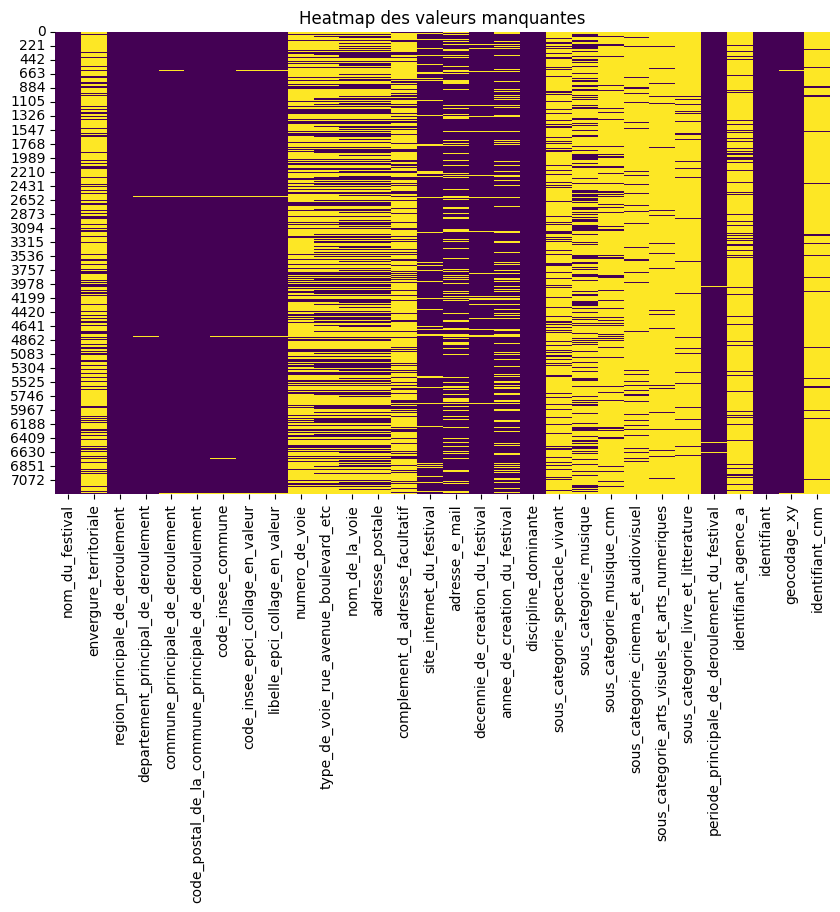

In [ ]:
# 1. Informations générales sur le DataFrame
print("1. Informations générales sur le DataFrame:")
df_info = df.info()
print(df_info)

# 2. Statistiques descriptives
print("\n2. Statistiques descriptives:")
df_describe = df.describe(include='all')
print (df_describe)

# 3. Vérifier les valeurs manquantes
print("\n3. Vérifier les valeurs manquantes:")
missing_values = df.isnull().sum()
print(missing_values)

# 4. Identifier les valeurs uniques dans chaque colonne
print("\n4. Identifier les valeurs uniques dans chaque colonne:")
unique_values = df.nunique()
print(unique_values)

# 5. Visualiser les valeurs manquantes avec un graphique
print("\n5. Visualiser les valeurs manquantes avec un graphique:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()




##L'essentiel des festivals, toute industries culturelles confondues, se produit entre le 21 juin et le 5 septembre.

In [ ]:
# Convertir la colonne 'annee_de_creation_du_festival' en format de date
df['annee_de_creation_du_festival'] = pd.to_datetime(df['annee_de_creation_du_festival'], errors='coerce')


In [ ]:
# Supprimer les colonnes à l'index spécifié
df_industries_creatives = df.drop(df.columns[[5, 7, 29, 26, 23, 24, 22, 19, 16, 11, 9, 10, 12, 13]], axis=1)

## Ce dataframe se concentre essentiellement sur les festivals de musique. Il a été donc décidé de supprimer toutes les colonnes concernant les autres industries créatives et culturelles.

In [ ]:
# Nouveau dataframe adapté pour un analyse des festivals de musique
df_industries_creatives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7282 entries, 0 to 7281
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   nom_du_festival                                7282 non-null   object        
 1   envergure_territoriale                         1898 non-null   object        
 2   region_principale_de_deroulement               7282 non-null   object        
 3   departement_principal_de_deroulement           7256 non-null   object        
 4   commune_principale_de_deroulement              7256 non-null   object        
 5   code_insee_commune                             7258 non-null   object        
 6   libelle_epci_collage_en_valeur                 7246 non-null   object        
 7   site_internet_du_festival                      6557 non-null   object        
 8   adresse_e_mail                                 5578 non-nu

In [ ]:
df_industries_creatives.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_insee_commune,libelle_epci_collage_en_valeur,site_internet_du_festival,adresse_e_mail,annee_de_creation_du_festival,discipline_dominante,sous_categorie_musique,sous_categorie_musique_cnm,periode_principale_de_deroulement_du_festival,identifiant,geocodage_xy
0,Gamerz,Départementale,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,Aix-en-Provence,13001,Métropole d'Aix-Marseille-Provence,http://www.lab-gamerz.com/site/,contact@lab-gamerz.com,2006-01-01,"Arts visuels, arts numériques",NaN,NaN,Après-saison (6 septembre - 31 décembre),FEST_13001_49,"43.5360708378, 5.39857444582"
1,Corsiclassic - festival de musique de chambre,NaN,Corse,Corse-du-Sud,Ajaccio,2A004,CA du Pays Ajaccien,helloasso.com/associations/corsiclassic,Corsiclassic@gmail.com ou bartoli.jeanne@wanad...,2016-01-01,Musique,Musique classique,NaN,Après-saison (6 septembre - 31 décembre),FEST_2A004_85,"41.9347926638, 8.70132275974"
2,Racines de ciel,NaN,Corse,Corse-du-Sud,Ajaccio,2A004,CA du Pays Ajaccien,https://www.facebook.com/RacinesDeCielAjaccio/,Viagrenelle@gmail.com,2009-01-01,"Livre, littérature",NaN,NaN,Avant-saison (1er janvier - 20 juin),FEST_2A004_96,"41.9347926638, 8.70132275974"
3,Le grand bivouac,Intercommunale,Auvergne-Rhône-Alpes,Savoie,Albertville,73011,CA Arlysère,https://www.grandbivouac.com/fr,communication@grandbivouac.org,2002-01-01,"Cinéma, audiovisuel",NaN,NaN,Après-saison (6 septembre - 31 décembre),FEST_73011_104,"45.6683987277, 6.40460338643"
4,Festival Acthea,NaN,Occitanie,Tarn,Albi,81004,CA de l'Albigeois (C2A),https://www.mines-albi.fr/acthea-17e-edition-d...,NaN,NaT,Spectacle vivant,NaN,NaN,Avant-saison (1er janvier - 20 juin),FEST_81004_113,"43.9258213622, 2.14686328555"


In [ ]:
# Chercher l'entrée 'Musique' dans la colonne car discipline domininante afin de retrouver que les festivals de Musique.
df_musique = df_industries_creatives.loc[df_industries_creatives['discipline_dominante'].eq('Musique')].copy()

In [ ]:
df_musique.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_insee_commune,libelle_epci_collage_en_valeur,site_internet_du_festival,adresse_e_mail,annee_de_creation_du_festival,discipline_dominante,sous_categorie_musique,sous_categorie_musique_cnm,periode_principale_de_deroulement_du_festival,identifiant,geocodage_xy
1,Corsiclassic - festival de musique de chambre,NaN,Corse,Corse-du-Sud,Ajaccio,2A004,CA du Pays Ajaccien,helloasso.com/associations/corsiclassic,Corsiclassic@gmail.com ou bartoli.jeanne@wanad...,2016-01-01,Musique,Musique classique,NaN,Après-saison (6 septembre - 31 décembre),FEST_2A004_85,"41.9347926638, 8.70132275974"
6,Septembre musical de l'Orne,Départementale,Normandie,Orne,Alençon,61001,CU d'Alençon,www.septembre-musical.com,info@septembre-musical.com,1983-01-01,Musique,Musique classique,"11- Musique classique, lyrique, contemporaine,...",Saison (21 juin - 5 septembre),FEST_61001_131,"48.4318193082, 0.0915406916107"
8,Algrange Music Live,NaN,Grand Est,Moselle,Algrange,57012,CA du Val de Fensch,NaN,elisalec@hotmail.com,NaT,Musique,NaN,07- Musiques actuelles sans distinction,Avant-saison (1er janvier - 20 juin),FEST_57012_145,"49.3644069158, 6.04829438392"
9,Brass Band,NaN,Centre-Val de Loire,Indre-et-Loire,Amboise,37003,CC du Val d'Amboise,https://openamboise.com/,NaN,1996-01-01,Musique,NaN,NaN,Avant-saison (1er janvier - 20 juin),FEST_37003_175,"47.3917237652, 1.00023994675"
10,Blues Berry,Intercommunale,Centre-Val de Loire,Indre,Ambrault,36003,CC Champagne Boischauts,http://associationbluesberry.weebly.com/,NaN,2014-01-01,Musique,"Jazz, Blues",NaN,Saison (21 juin - 5 septembre),FEST_36003_180,"46.7837338524, 1.94971417939"


In [ ]:
df_musique.shape

(3228, 16)

##Pour faciliter la lecture :

**unique** renvoie les valeurs uniques elles-mêmes, tandis que **nunique** renvoie le nombre de valeurs uniques sans les lister.

##Exploration colonne 'sous_categorie_musique'

In [ ]:
# Supposons que df_musique_only soit votre DataFrame
unique_values = df_musique['sous_categorie_musique'].nunique()

# Afficher les valeurs uniques
print("Valeurs uniques dans les colonne sous_categorie_musique' :")
print(unique_values)


Valeurs uniques dans les colonne sous_categorie_musique' :
757


In [ ]:
# Supposons que df_musique_only soit votre DataFrame
unique_values = df_musique['sous_categorie_musique'].unique()

# Afficher les valeurs uniques
print("Valeurs uniques dans les colonne sous_categorie_musique' :")
print(unique_values)


Valeurs uniques dans les colonne sous_categorie_musique' :
['Musique classique' nan 'Jazz, Blues'
 'jazz, blues et musiques improvisées' 'Musiques du monde'
 'Musique savante' 'Jazz Blues'
 'Metal, hard rock, Musique contemporaine, Musiques du monde, Musiques électroniques, techno'
 'Musique classique, Opéra' 'Opéra, Musique classique, Musique Lyrique'
 'Musiques classiques et savantes' 'musique ancienne'
 'Jazz, blues, Musique classique, Musique contemporaine, Musiques du monde, Musiques traditionnelles'
 'Musiques électroniques, techno' 'Jazz, blues'
 'Musique classique, musique contemporaine' 'Rock, Métal'
 'Musique traditionnelle'
 'Musiques du monde, Musiques traditionnelles, RnB, Musiques électroniques, techno, Hip-hop, rap, slam, Pop, rock, Jazz, blues, Musique contemporaine'
 'Musiques diverses' 'Musiques amplifiées ou électroniques'
 'Blues ; funk ; gospel/spiritual ; rock ; soul' 'Musiques actuelles'
 'Chanson ou variété française, Hip-hop, rap, slam, Musiques électroniques, 

## Exploration colonne 'sous_categorie_musique_cnm' - CNM = Centre national de la musique

In [ ]:
# Afficher les valuers nunique
unique_values = df_musique['sous_categorie_musique_cnm'].nunique()

# Afficher les valeurs uniques
print("Valeurs uniques dans les colonne sous_categorie_musique_cnm' :")
print(unique_values)


Valeurs uniques dans les colonne sous_categorie_musique_cnm' :
13


In [ ]:
# Afficher les valeurs unique
unique_values = df_musique['sous_categorie_musique_cnm'].unique()

# Afficher les valeurs uniques
print("Valeurs uniques dans les colonne sous_categorie_musique_cnm' :")
print(unique_values)


Valeurs uniques dans les colonne sous_categorie_musique_cnm' :
[nan '11- Musique classique, lyrique, contemporaine, autres'
 '07- Musiques actuelles sans distinction'
 '03- Jazz, blues et musiques improvisées' '09- Pluridisciplinaire'
 '02- Musiques amplifiées ou électroniques'
 '04- Musiques traditionnelles et du monde'
 '08- Musiques (sans distinction esthétique)' '01- Chanson'
 '15- Fête de la ville, feria, fête votive, fête de la pomme, etc.'
 '14- Autres disciplines culturelles (arts plastiques, cinéma, photographie, livre...)'
 '05- Humour'
 '13- Autres spectacles (théâtre, arts de la rue et du cirque...)'
 '10- Comédie musicale']


Une fontion a été créer pour détecter les mots 'contemporaine', 'monde', 'actuelles' dans les colonnes 'sous_categorie_musique', 'sous_categorie_musique_cnm'

In [ ]:
def filter_words(dataframe, columns, words):
    # Convertir les mots en minuscules pour une recherche insensible à la casse
    words = [str(word).lower() for word in words]

    # Créer un masque pour les lignes contenant au moins un des mots spécifiés
    mask = dataframe[columns].apply(lambda x: any(isinstance(val, str) and any(word in str(val).lower() for word in words) for val in x), axis=1)

    # Appliquer le masque et réinitialiser l'index du nouveau DataFrame
    filtered_df = dataframe[mask].reset_index(drop=True)

    return filtered_df

# Utiliser la fonction pour filtrer les lignes contenant 'contemporaine', 'monde' et 'actuelles'
df_filtered = filter_words(df_musique, ['sous_categorie_musique', 'sous_categorie_musique_cnm'], ['contemporaine', 'monde', 'actuelles'])


## Création du df_filtered.head contenant que les entrées 'contemporaine', 'monde', 'actuelles'



In [ ]:
df_filtered.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_insee_commune,libelle_epci_collage_en_valeur,site_internet_du_festival,adresse_e_mail,annee_de_creation_du_festival,discipline_dominante,sous_categorie_musique,sous_categorie_musique_cnm,periode_principale_de_deroulement_du_festival,identifiant,geocodage_xy
0,Septembre musical de l'Orne,Départementale,Normandie,Orne,Alençon,61001,CU d'Alençon,www.septembre-musical.com,info@septembre-musical.com,1983-01-01,Musique,Musique classique,"11- Musique classique, lyrique, contemporaine,...",Saison (21 juin - 5 septembre),FEST_61001_131,"48.4318193082, 0.0915406916107"
1,Algrange Music Live,NaN,Grand Est,Moselle,Algrange,57012,CA du Val de Fensch,NaN,elisalec@hotmail.com,NaT,Musique,NaN,07- Musiques actuelles sans distinction,Avant-saison (1er janvier - 20 juin),FEST_57012_145,"49.3644069158, 6.04829438392"
2,Festival andalou,Régionale,Provence-Alpes-Côte d'Azur,Vaucluse,Avignon,84007,CA du Grand Avignon (COGA),https://lefestivalandalou.com/,contact@lefestivalandalou.com,2002-01-01,Musique,Musiques du monde,09- Pluridisciplinaire,Avant-saison (1er janvier - 20 juin),FEST_84007_514,"43.9352448339, 4.84071572505"
3,Avoine Zone Groove,Intercommunale,Centre-Val de Loire,Indre-et-Loire,Avoine,37011,"CC Chinon, Vienne et Loire",www.avoinezonegroove.fr,NaN,2000-01-01,Musique,"Jazz, Blues",07- Musiques actuelles sans distinction,Saison (21 juin - 5 septembre),FEST_37011_550,"47.2237767737, 0.18754463005"
4,Le Solstice,NaN,Centre-Val de Loire,Indre-et-Loire,Beaulieu-lès-Loches,37020,CC Loches Sud Touraine,www.festival-solstice.com,ladsl37600@gmail.com,1986-01-01,Musique,"Metal, hard rock, Musique contemporaine, Musiq...",NaN,Saison (21 juin - 5 septembre),FEST_37020_676,"47.1281892877, 1.02294110179"


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   nom_du_festival                                1282 non-null   object        
 1   envergure_territoriale                         266 non-null    object        
 2   region_principale_de_deroulement               1282 non-null   object        
 3   departement_principal_de_deroulement           1281 non-null   object        
 4   commune_principale_de_deroulement              1282 non-null   object        
 5   code_insee_commune                             1282 non-null   object        
 6   libelle_epci_collage_en_valeur                 1281 non-null   object        
 7   site_internet_du_festival                      1232 non-null   object        
 8   adresse_e_mail                                 980 non-nul

##Explorer sur la colonne 'region_principale_de_deroulement' afin de trouvers des informations concernant les territoire dont les festivals de musiques lieu.

In [ ]:
# Utilisez la méthode unique() pour obtenir les valeurs uniques de la colonne 'region_principale_de_deroulement'
regions_uniques = df_filtered['region_principale_de_deroulement'].unique()

# Affichez les valeurs uniques
print(regions_uniques)

['Normandie' 'Grand Est' "Provence-Alpes-Côte d'Azur"
 'Centre-Val de Loire' 'Nouvelle-Aquitaine' 'Bourgogne-Franche-Comté'
 'Île-de-France' 'Occitanie' 'Auvergne-Rhône-Alpes' 'Pays de la Loire'
 'Mayotte' 'Bretagne' 'Guyane' 'La Réunion' 'Hauts-de-France' 'Corse'
 'Nouvelle-Calédonie']


In [ ]:
regions_nuniques = df_filtered['region_principale_de_deroulement'].nunique()
print(regions_nuniques)

17


## Nombre de Festivals par Région :

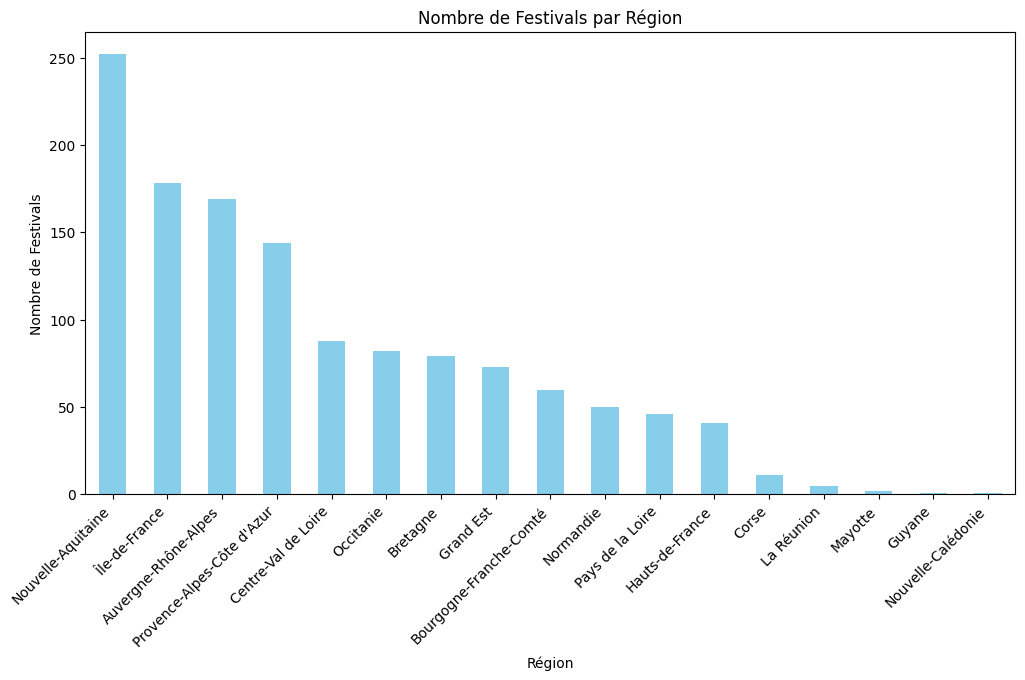

In [ ]:
# Grouper le nombre de festivals par région
festivals_par_region = df_filtered['region_principale_de_deroulement'].value_counts()

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
festivals_par_region.plot(kind='bar', color='skyblue')
plt.title('Nombre de Festivals par Région')
plt.xlabel('Région')
plt.ylabel('Nombre de Festivals')
plt.xticks(rotation=45, ha='right')  # Pour une meilleure lisibilité des étiquettes
plt.show()

## Nombre de Festivals des Musiques du Monde , Actuelles ou Comteporaine créés par Année :

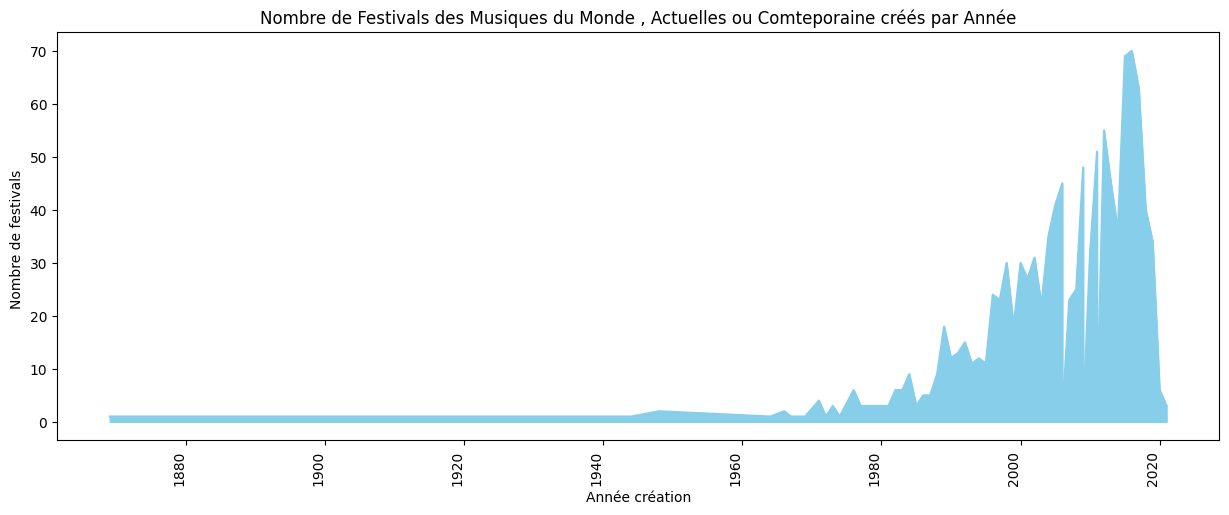

In [ ]:
# Grouper les festivals par année de création
festivals_par_annee = df_filtered['annee_de_creation_du_festival'].value_counts().sort_index()

# Créer un graphique en utilisant un graphique à barres
plt.figure(figsize=(15, 6))
festivals_par_annee.plot(kind='area', color='skyblue')
plt.title('Nombre de Festivals des Musiques du Monde , Actuelles ou Comteporaine créés par Année')
plt.xlabel('Année création')
plt.ylabel('Nombre de festivals ')
plt.xticks(rotation=90, ha='right')  # Pour une meilleure lisibilité des étiquettes
plt.show()

In [ ]:
df_filtered.shape

(1282, 16)

##Informatons des festivals créés entre 1900 et 1980 :

In [ ]:
# Choisir les colonnes à afficher
colonnes_a_afficher = ['nom_du_festival', 'annee_de_creation_du_festival']

# Filtrer les festivals créés entre 1900 et 1980 en choisissant les colonnes à afficher
df_filtres_1900_1980 = df_filtered.loc[(df_filtered['annee_de_creation_du_festival'] >= '1900') & (df_filtered['annee_de_creation_du_festival'] <= '1980'), colonnes_a_afficher]

# Trier les festivals par année de création de manière ascendante
df_filtres_1900_1980 = df_filtres_1900_1980.sort_values(by='annee_de_creation_du_festival', ascending=True)

# Afficher les festivals filtrés avec les colonnes sélectionnées, triés par année de création ascendante
print(df_filtres_1900_1980)

                                        nom_du_festival  \
1196                          Festival des Filets Bleus   
522                                         Cornouaille   
989                               Festival de Royaumont   
617   Festival international de musique de Besançon ...   
176                          Festival d'Aix-en-provence   
769                     Festival de la Grange de Meslay   
301                              Nohant Festival Chopin   
38                       Festival de Boucard Haut-Berry   
1137    Cycle de musiques sacrées du festival d'avignon   
215                                     Jazz en Liberté   
778                             Festival de Saint-Denis   
332                         Festival de cordes sur ciel   
63                               Nuits musicales d'Uzès   
636            Cycle Musical de la Chapelle de Kersaint   
14               Festival de musique de Cordes-sur-Ciel   
49                                                Fisel 

##Informations des festivals créés entre 2000 et 2023 :

In [ ]:
# Choisir les colonnes à afficher
colonnes_a_afficher = ['nom_du_festival', 'annee_de_creation_du_festival', 'site_internet_du_festival','region_principale_de_deroulement','sous_categorie_musique', 'sous_categorie_musique_cnm']

# Filtrer les festivals créés entre 2000 et 2023 en choisissant les colonnes à afficher
df_filtres_2000_2023 = df_filtered.loc[(df_filtered['annee_de_creation_du_festival'] >= '2000') & (df_filtered['annee_de_creation_du_festival'] <= '2023'), colonnes_a_afficher]

# Trier les festivals par année de création de manière ascendante
df_filtres_2000_2023 = df_filtres_2000_2023.sort_values(by='annee_de_creation_du_festival', ascending=True)

# Afficher les festivals filtrés avec les colonnes sélectionnées, triés par année de création ascendante
print(df_filtres_2000_2023)


                                        nom_du_festival  \
460                                        Garonna Show   
1107                                   Village Sessions   
1232                                      Kind Of Belou   
360                   Festival International du Tambour   
635                        Festival des Abracadagrasses   
...                                                 ...   
1022                                        Les Volques   
472                                            Moissons   
642                                      Caravan'Square   
1017                                  Au large festival   
1056  La Chartreuse du Liget en Musiques Hier & Aujo...   

     annee_de_creation_du_festival  \
460                     2000-01-01   
1107                    2000-01-01   
1232                    2000-01-01   
360                     2000-01-01   
635                     2000-01-01   
...                            ...   
1022                    2

In [ ]:
df_filtres_2000_2023.describe(include='all')

<ipython-input-102-1153ed4e76a1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_filtres_2000_2023.describe(include='all')


,nom_du_festival,annee_de_creation_du_festival,site_internet_du_festival,region_principale_de_deroulement,sous_categorie_musique,sous_categorie_musique_cnm
count,834,834,819,834,787,395
unique,833,25,814,15,313,10
top,La bonne aventure,2016-01-01 00:00:00,http://www.confort-moderne.fr,Nouvelle-Aquitaine,Musiques actuelles,07- Musiques actuelles sans distinction
freq,2,70,2,198,331,189
first,NaN,2000-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2021-01-01 00:00:00,NaN,NaN,NaN,NaN


<Axes: >

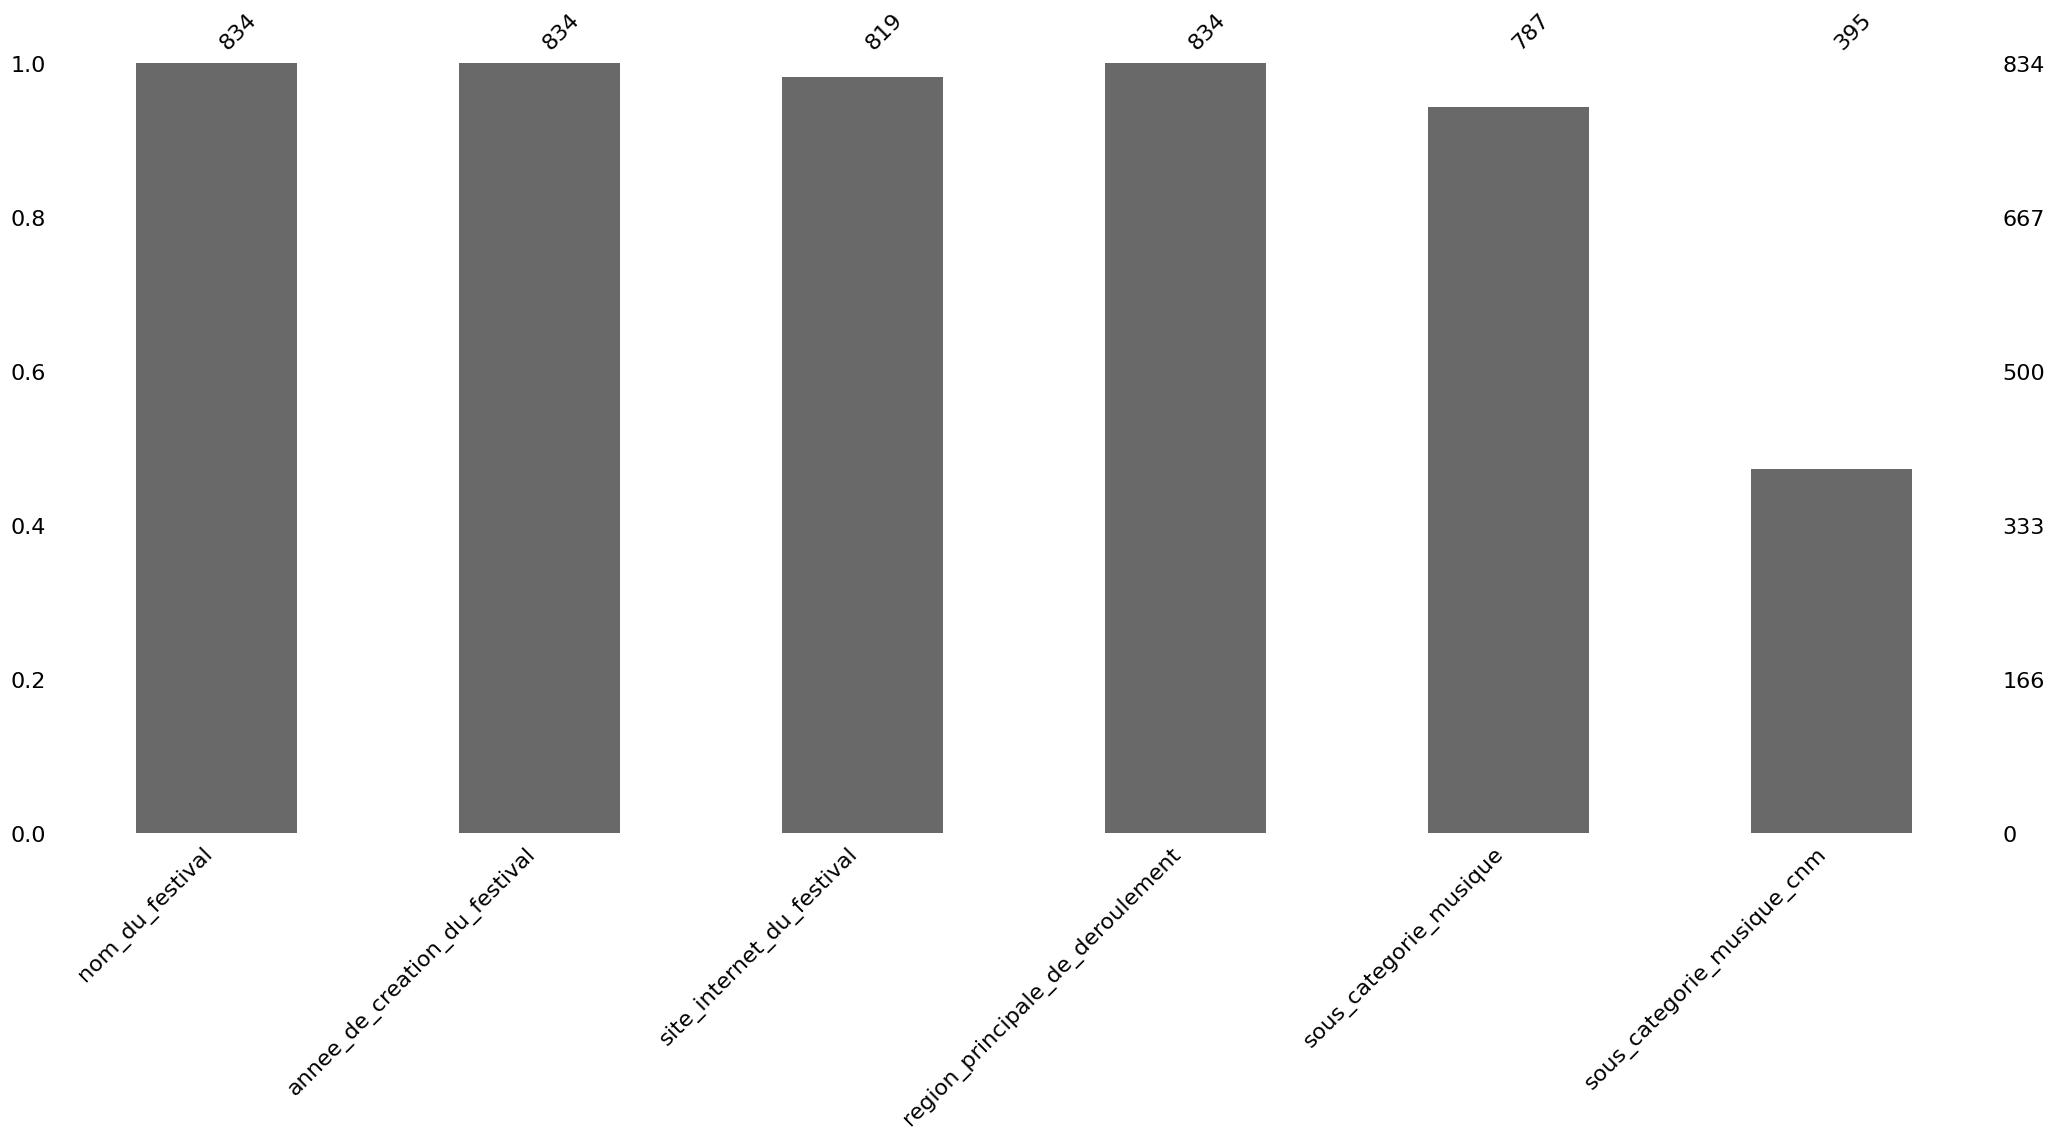

In [ ]:
mno.bar(df_filtres_2000_2023)

<Axes: >

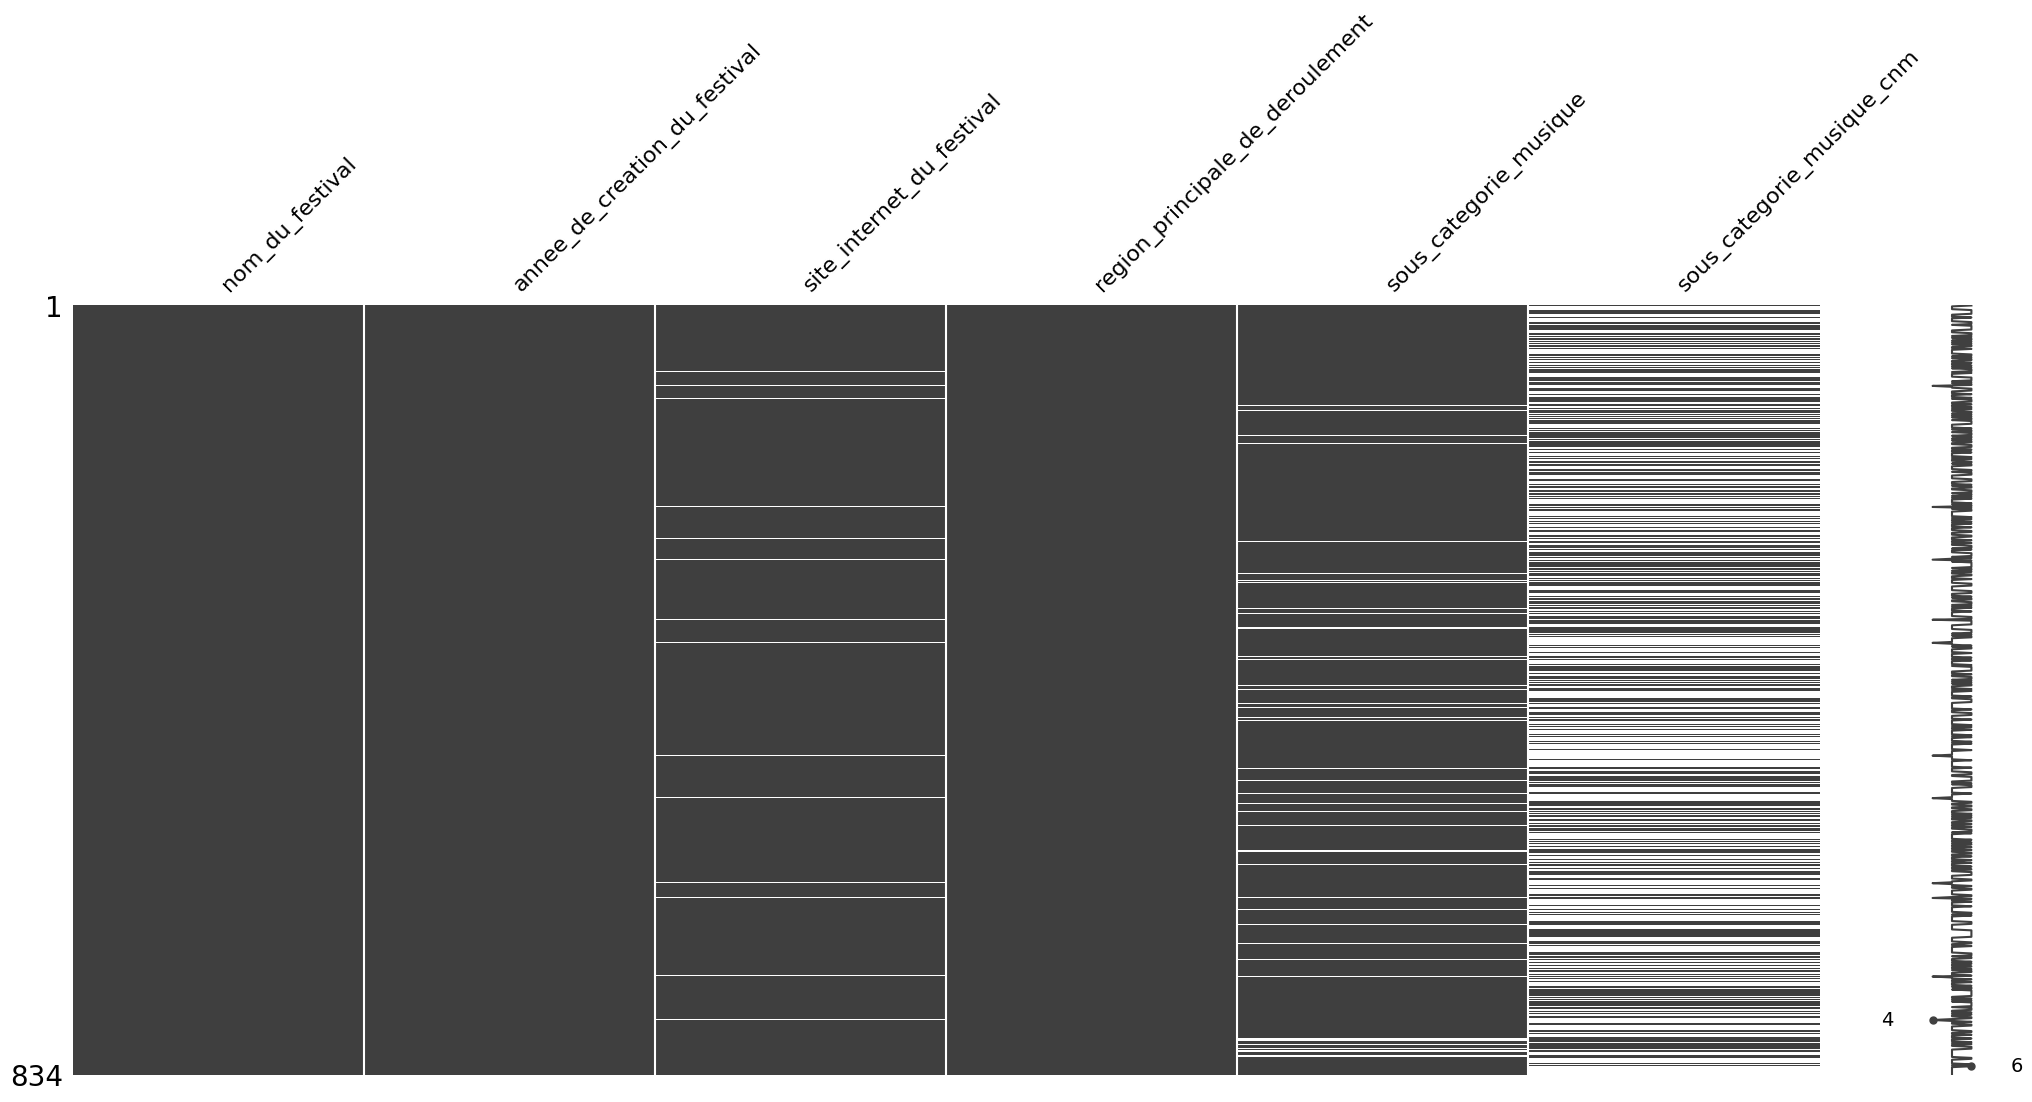

In [ ]:
mno.matrix(df_filtres_2000_2023)

In [ ]:
df_filtres_2000_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 460 to 1056
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   nom_du_festival                   834 non-null    object        
 1   annee_de_creation_du_festival     834 non-null    datetime64[ns]
 2   site_internet_du_festival         819 non-null    object        
 3   region_principale_de_deroulement  834 non-null    object        
 4   sous_categorie_musique            787 non-null    object        
 5   sous_categorie_musique_cnm        395 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 45.6+ KB


##Afin de faciliter la lecture, créer une fontion pour regrouper les festivals par région :



In [ ]:
import pandas as pd

def filtrer_par_region(df):
    # Créer un nouveau dataframe en groupant par région
    df_par_region = pd.concat([group.copy() for _, group in df.groupby('region_principale_de_deroulement')])

    return df_par_region

# Appliquer la fonction à votre dataframe
df_filtres_par_region = filtrer_par_region(df_filtres_2000_2023)

# Afficher le nouveau dataframe
print(df_filtres_par_region)


                  nom_du_festival annee_de_creation_du_festival  \
978   Musiques en Vivarais Lignon                    2000-01-01   
447      Attention les feuilles !                    2001-01-01   
112          Les grosses guitares                    2001-01-01   
1223                Changez d’air                    2001-01-01   
214                Les Authentiks                    2002-01-01   
...                           ...                           ...   
1016        Eole Factory Festival                    2019-01-01   
1113           L'Été des Ateliers                    2019-01-01   
203              Sulfure Festival                    2019-01-01   
846   Beaugrenelle Music Festival                    2019-01-01   
678              Essonne en Scène                    2019-01-01   

                              site_internet_du_festival  \
978                                www.cc-hautlignon.fr   
447   http://theatredescollines.annecy.fr/festivals/...   
112               

In [ ]:
# Déplace colonne 'region_principale_de_deroulement' en index
colonne_a_deplacer = 'region_principale_de_deroulement'

# Déplacez la colonne 'region_principale_de_deroulement' en tant que premier index
df_filtres_par_region.set_index(colonne_a_deplacer, inplace=True)

## Création du df_filtres_par_region :

In [ ]:
df_filtres_par_region.head()

,nom_du_festival,annee_de_creation_du_festival,site_internet_du_festival,sous_categorie_musique,sous_categorie_musique_cnm
region_principale_de_deroulement,,,,,
Auvergne-Rhône-Alpes,Musiques en Vivarais Lignon,2000-01-01,www.cc-hautlignon.fr,"Musique classique, Musiques du monde","11- Musique classique, lyrique, contemporaine,..."
Auvergne-Rhône-Alpes,Attention les feuilles !,2001-01-01,http://theatredescollines.annecy.fr/festivals/...,Musiques actuelles,01- Chanson
Auvergne-Rhône-Alpes,Les grosses guitares,2001-01-01,http://www.lesgrossesguitares.com,Musiques actuelles,07- Musiques actuelles sans distinction
Auvergne-Rhône-Alpes,Changez d’air,2001-01-01,http://www.mairie-stgenislesollieres.fr/fr/inf...,"Chanson ou variété française, Pop, rock",07- Musiques actuelles sans distinction
Auvergne-Rhône-Alpes,Les Authentiks,2002-01-01,www.festival-authentiks.com,"Chanson ou variété française, Hip-hop, rap, sl...",07- Musiques actuelles sans distinction


In [ ]:
df_filtres_par_region.tail()

,nom_du_festival,annee_de_creation_du_festival,site_internet_du_festival,sous_categorie_musique,sous_categorie_musique_cnm
region_principale_de_deroulement,,,,,
Île-de-France,Eole Factory Festival,2019-01-01,https://eolefactoryfestival.com/,"Jazz, blues, Musique classique, Musiques actue...","03- Jazz, blues et musiques improvisées"
Île-de-France,L'Été des Ateliers,2019-01-01,https://www.ateliersmedicis.fr/,"Musiques du monde, Musiques traditionnelles, H...",NaN
Île-de-France,Sulfure Festival,2019-01-01,http://sulfure-festival,Musiques actuelles,NaN
Île-de-France,Beaugrenelle Music Festival,2019-01-01,www.beaugrenelle-paris.com/,Musiques actuelles,07- Musiques actuelles sans distinction
Île-de-France,Essonne en Scène,2019-01-01,http://www.essonne.fr/culture-loisirs-tourisme...,Musiques actuelles,07- Musiques actuelles sans distinction


## Graphiquer le nombre de festivals par région :



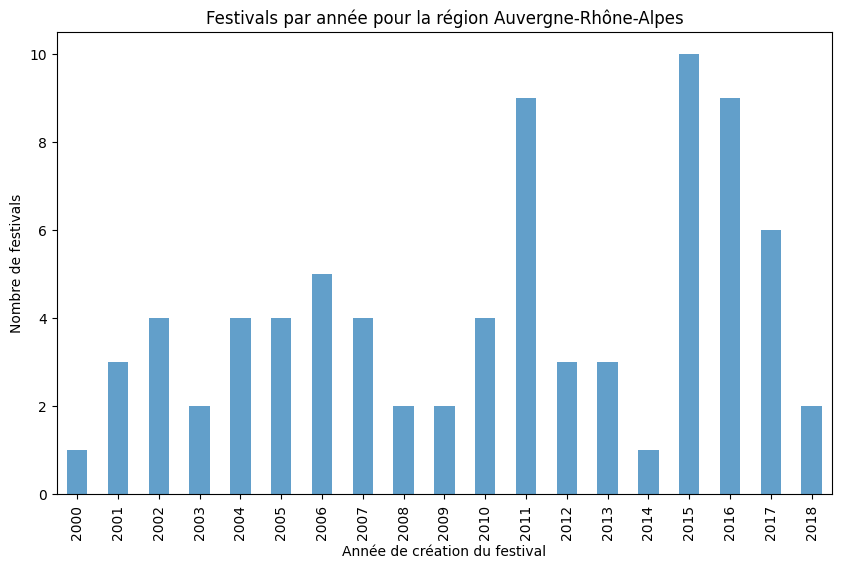

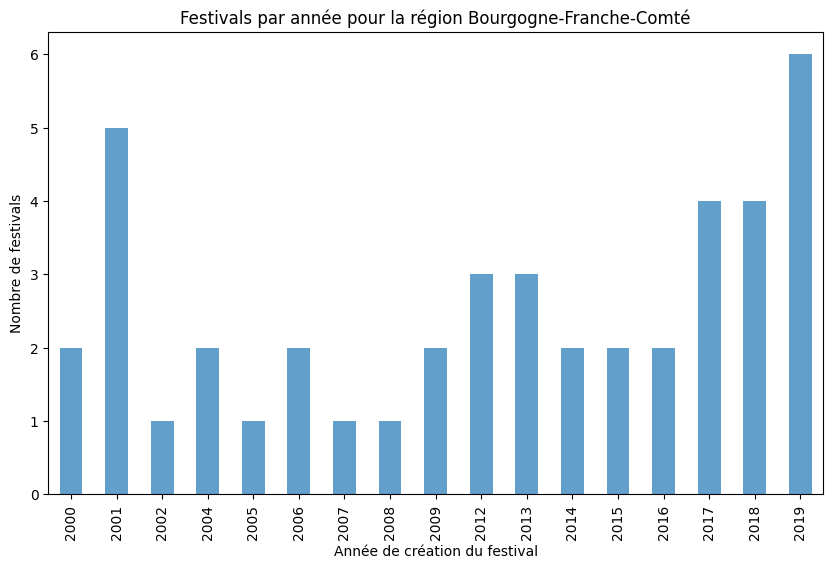

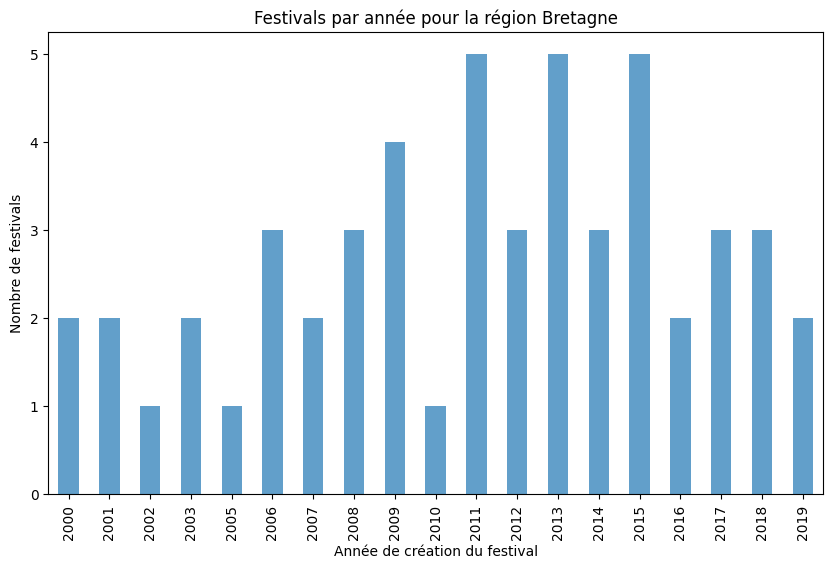

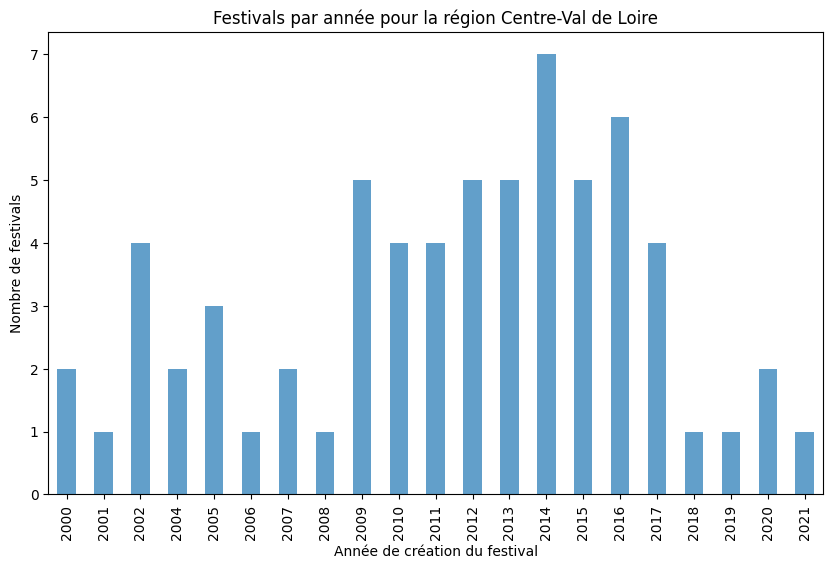

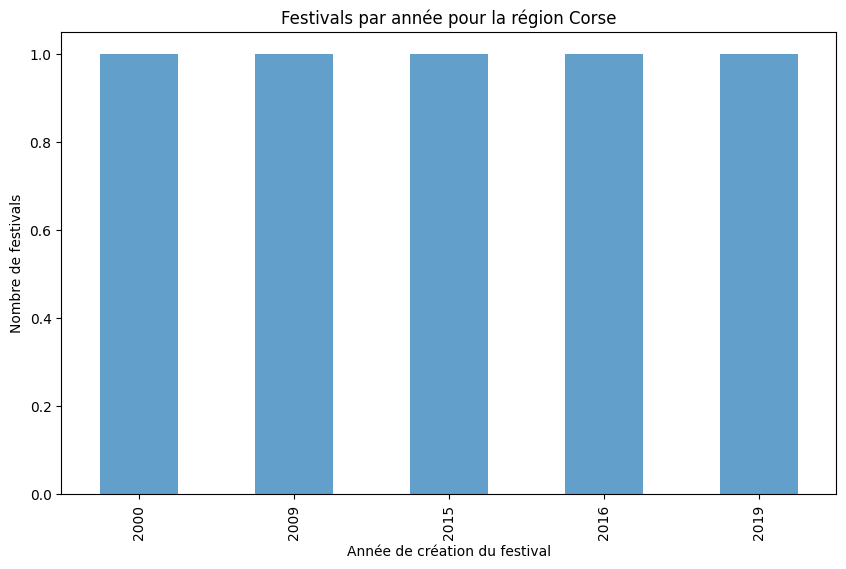

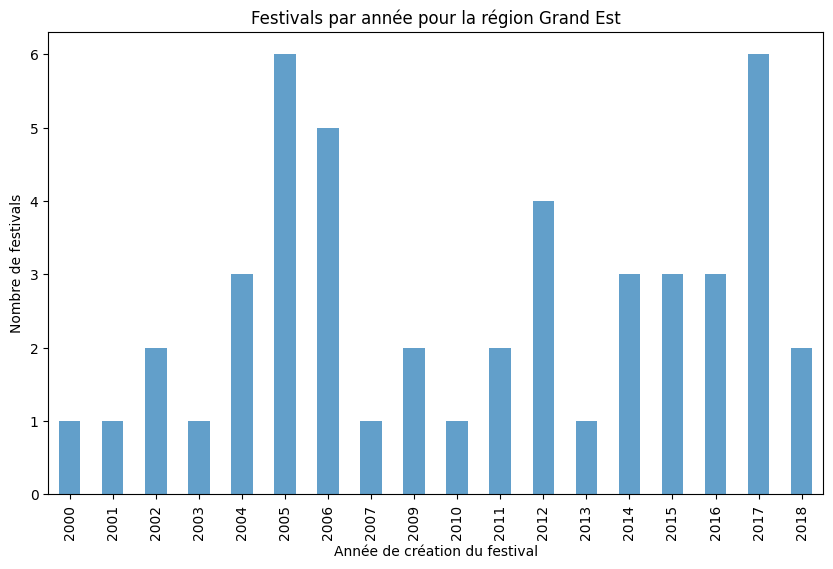

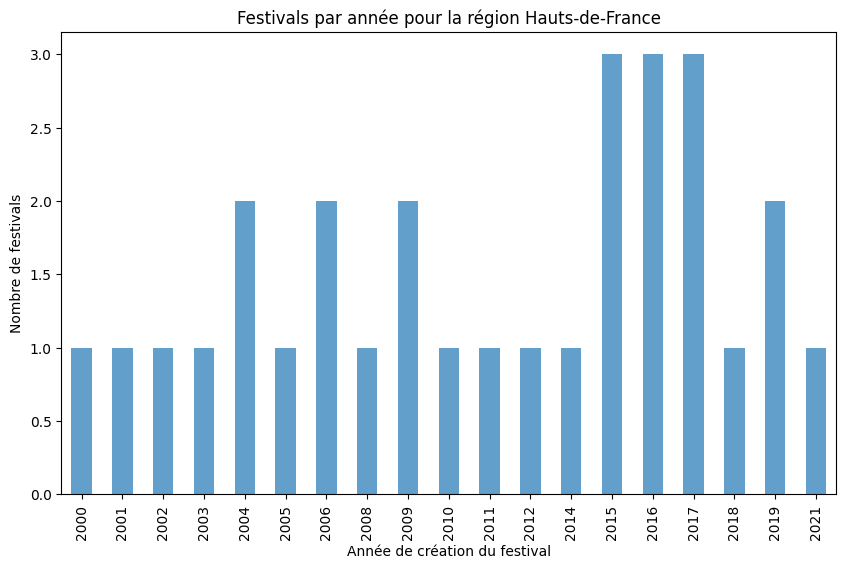

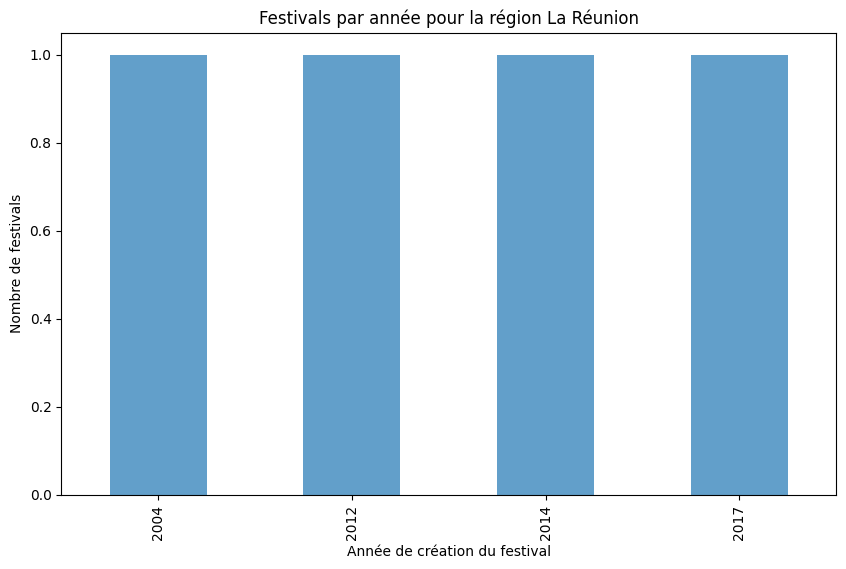

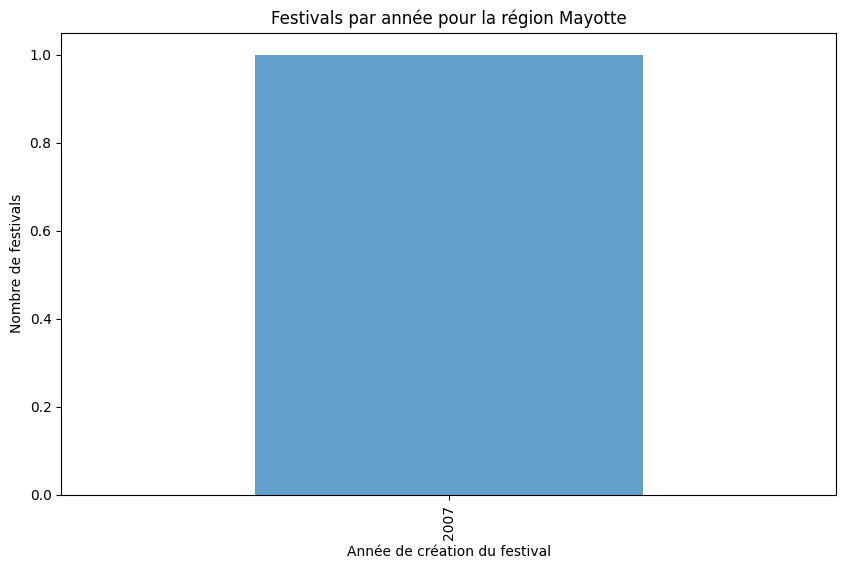

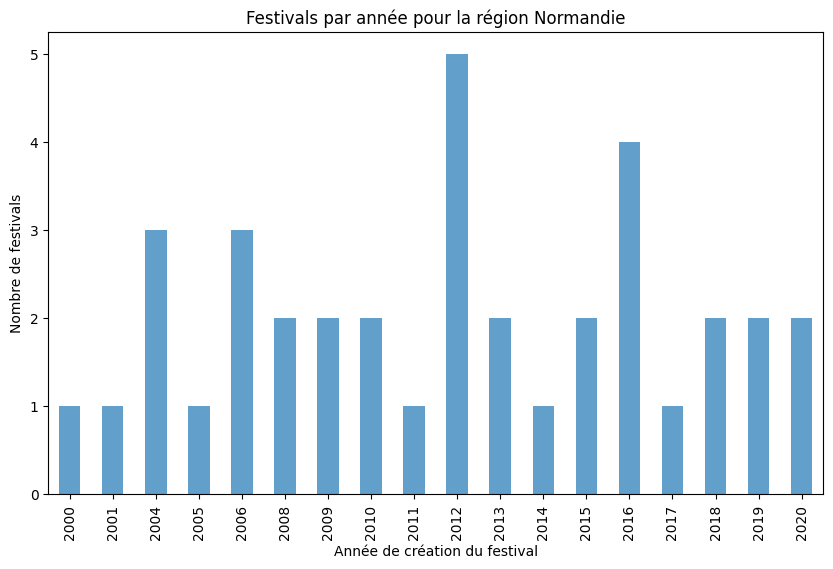

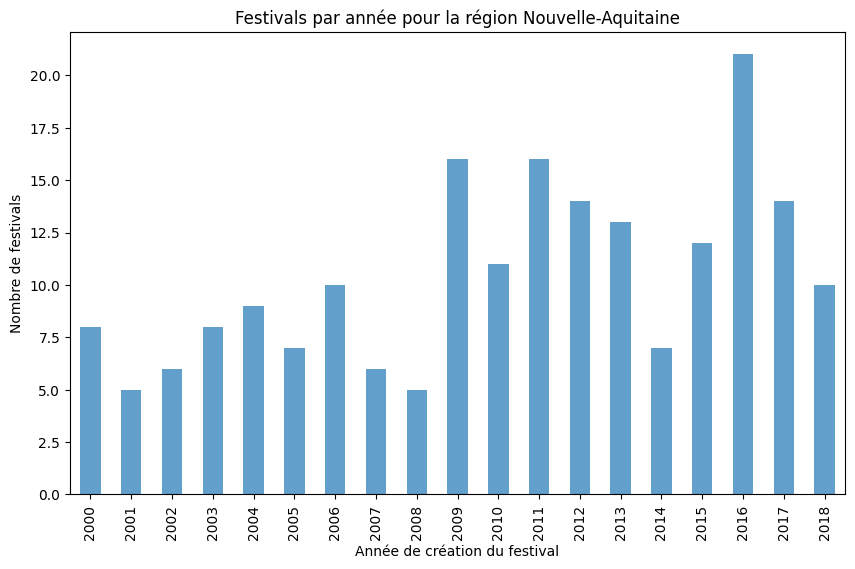

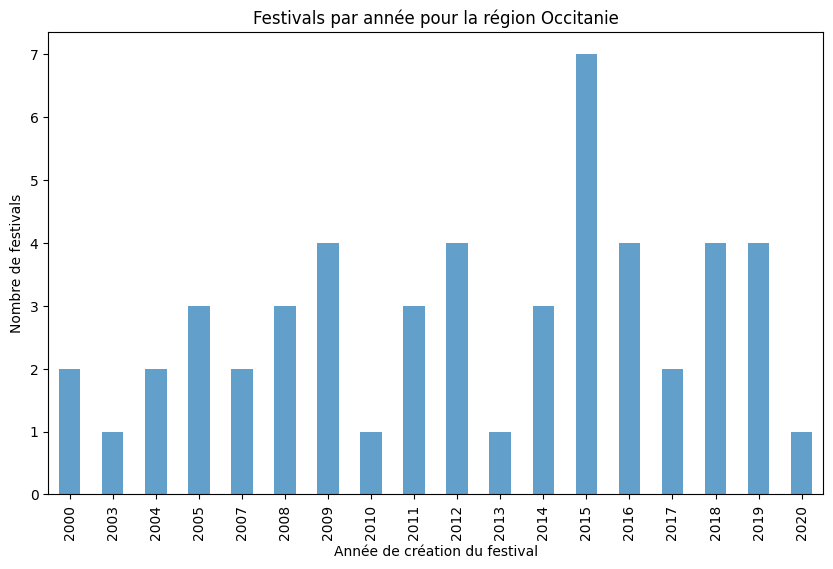

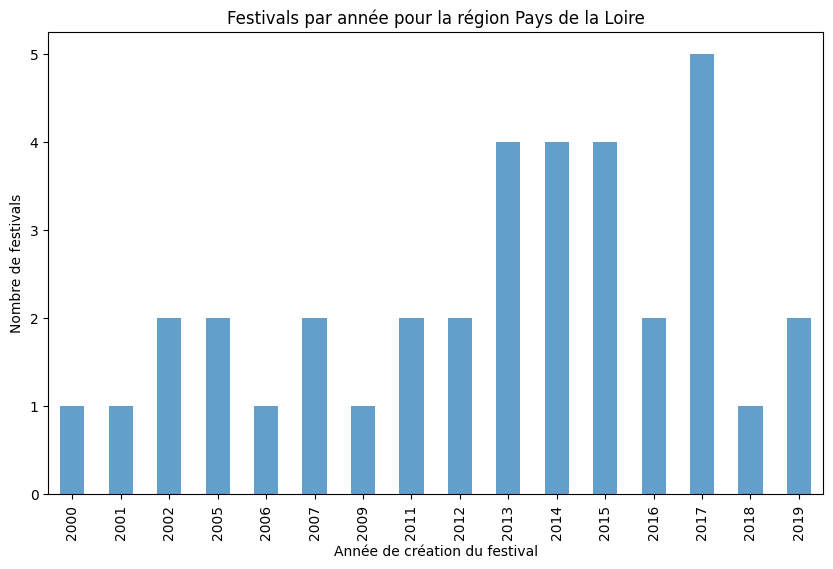

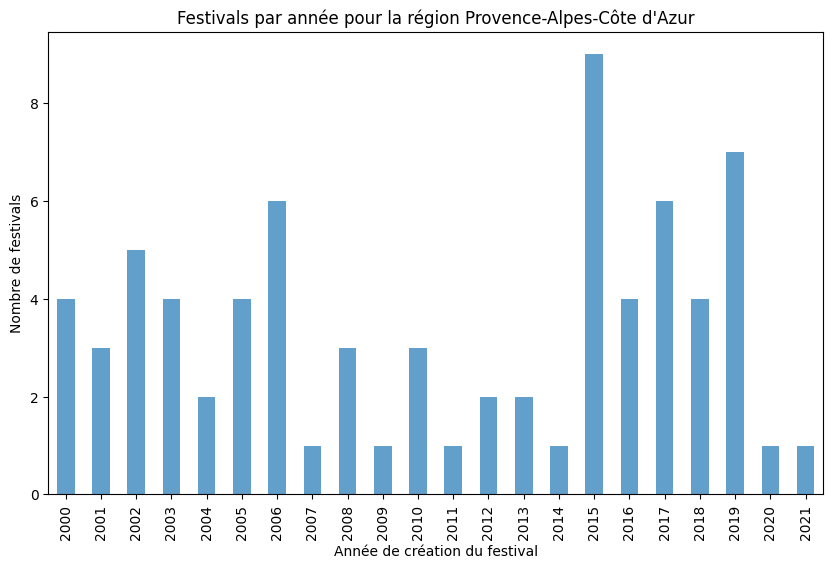

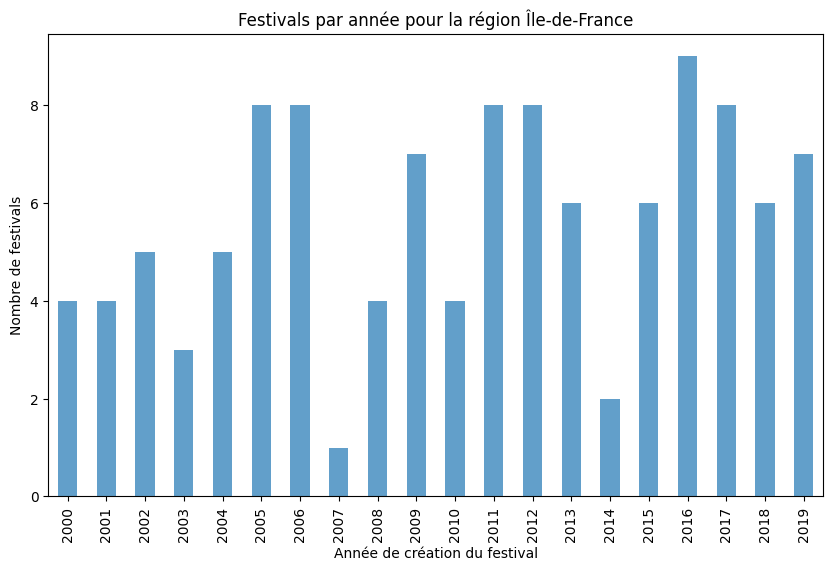

In [ ]:
# Créer un graphique en barres pour chaque région
for region, data in df_filtres_par_region.groupby('region_principale_de_deroulement'):
    plt.figure(figsize=(10, 6))
    # Convertir la colonne 'annee_de_creation_du_festival' en datetime si elle ne l'est pas déjà
    data['annee_de_creation_du_festival'] = pd.to_datetime(data['annee_de_creation_du_festival'], errors='coerce')

    # Formater l'année selon le format que vous souhaitez (ici, '%Y' pour l'année à 4 chiffres)
    data['annee_de_creation_du_festival'] = data['annee_de_creation_du_festival'].dt.strftime('%Y')

    # Utiliser value_counts() pour compter le nombre de festivals par année
    data['annee_de_creation_du_festival'].value_counts().sort_index().plot(kind='bar', alpha=0.7)

    plt.title(f"Festivals par année pour la région {region}")
    plt.xlabel('Année de création du festival')
    plt.ylabel('Nombre de festivals')
    plt.show()


## Graphiquer le nombre de festivals par région en fonction des musiques actuelles, du monde et contemporaine :

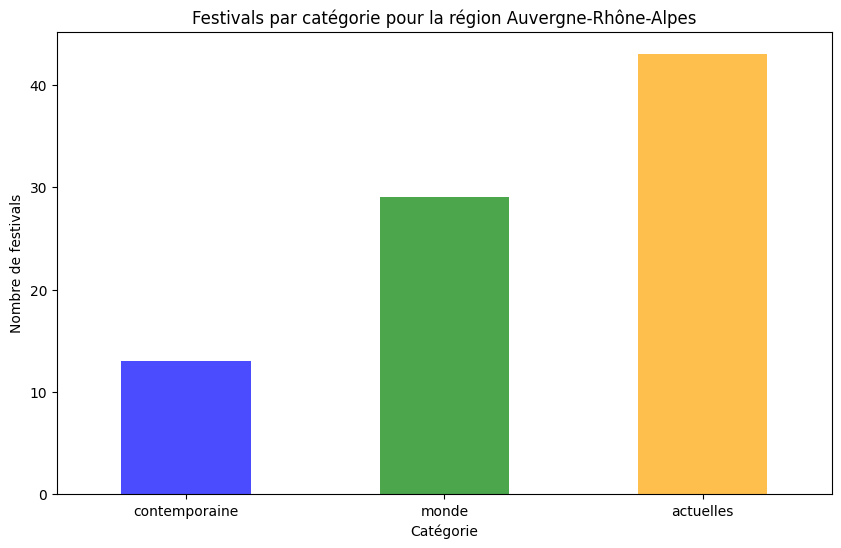

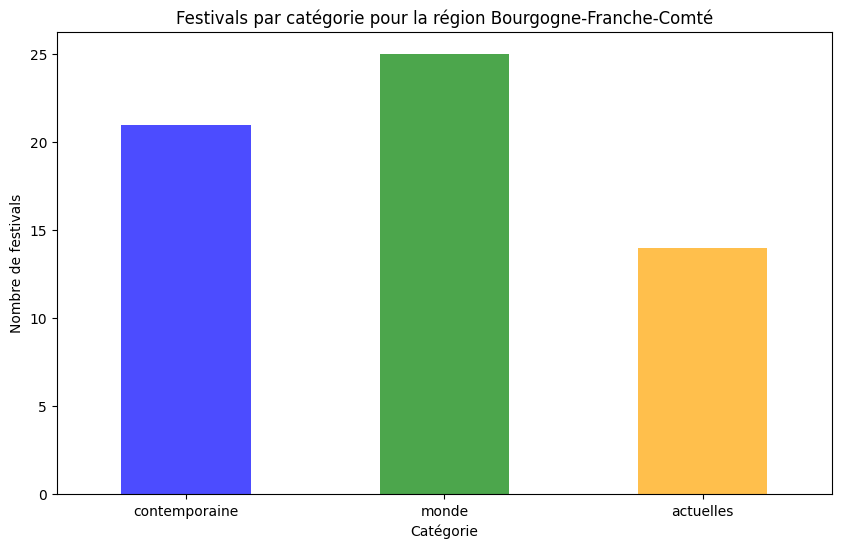

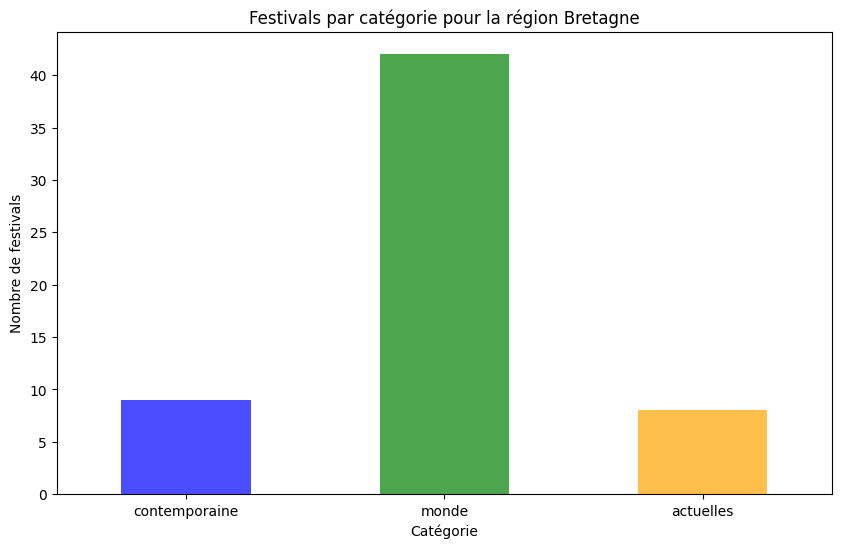

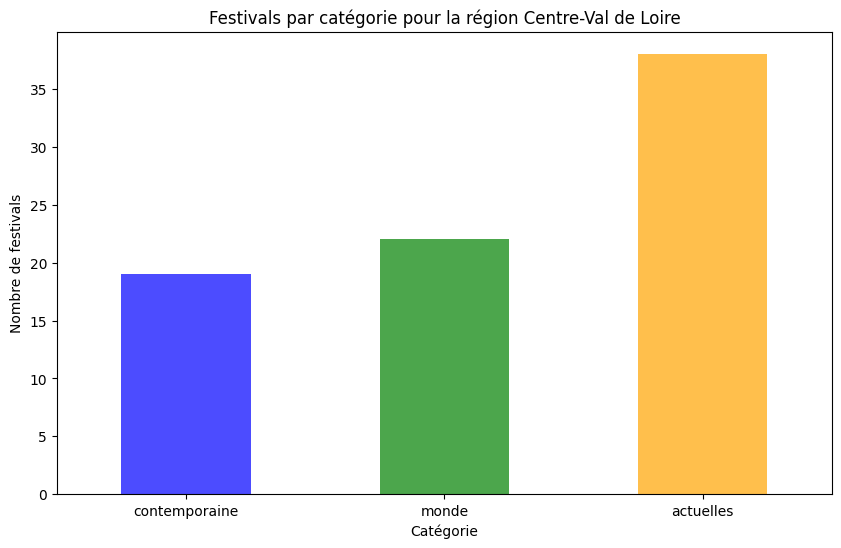

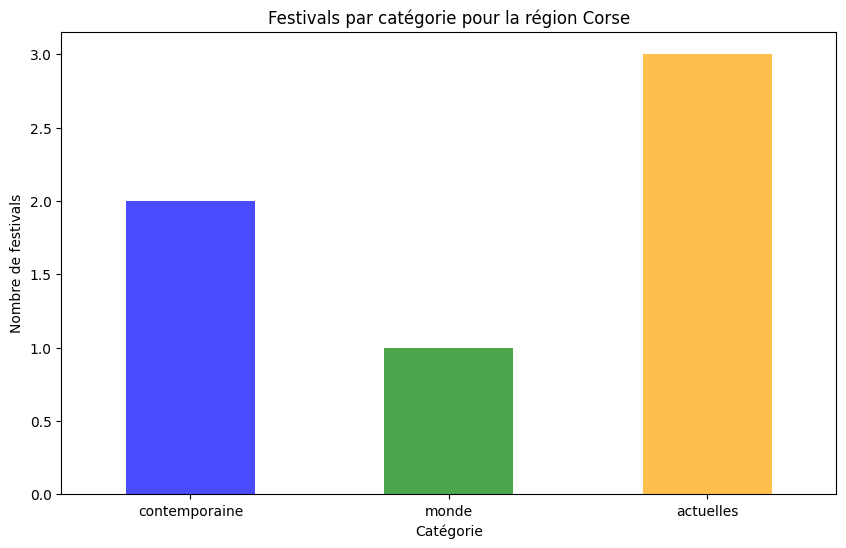

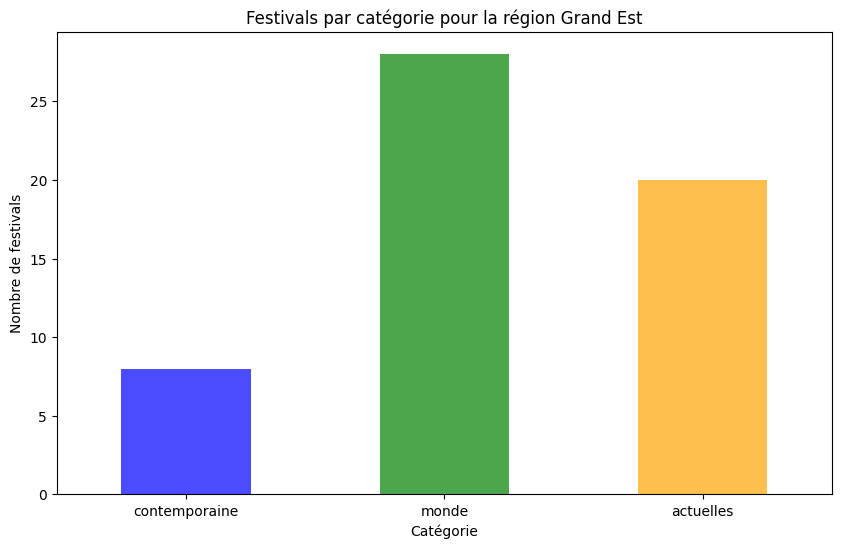

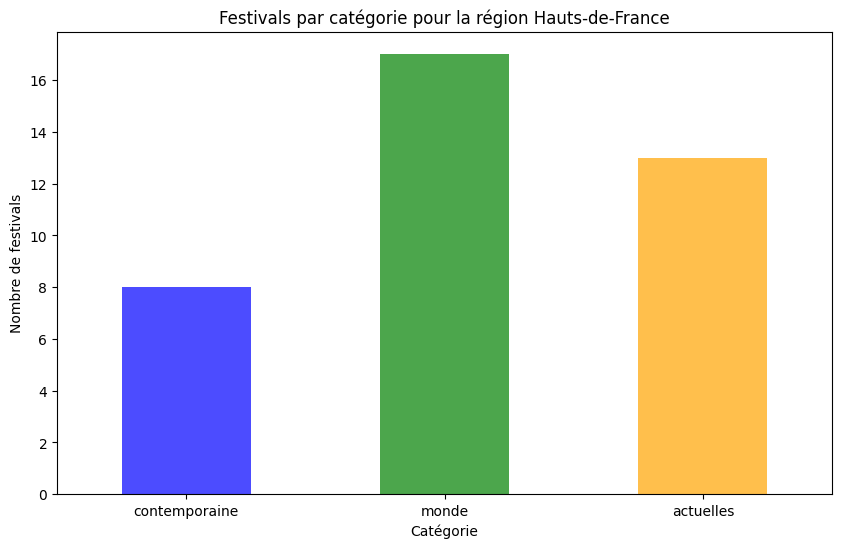

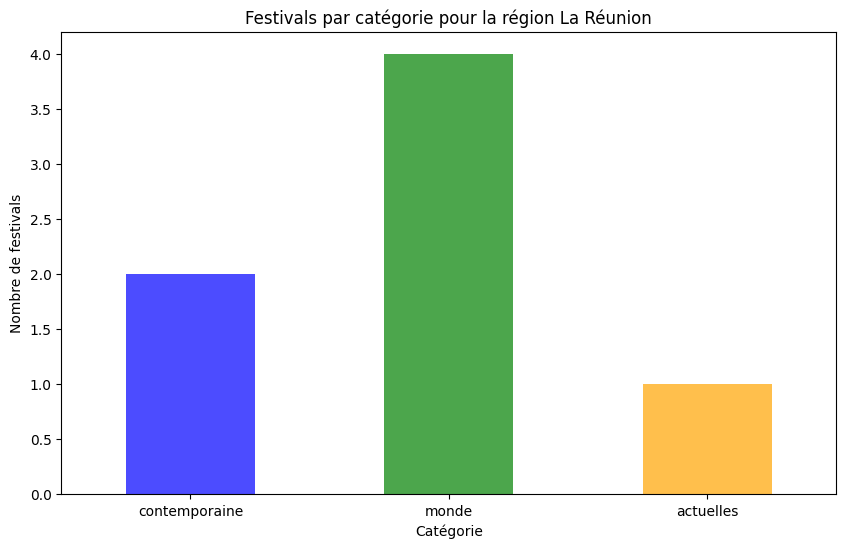

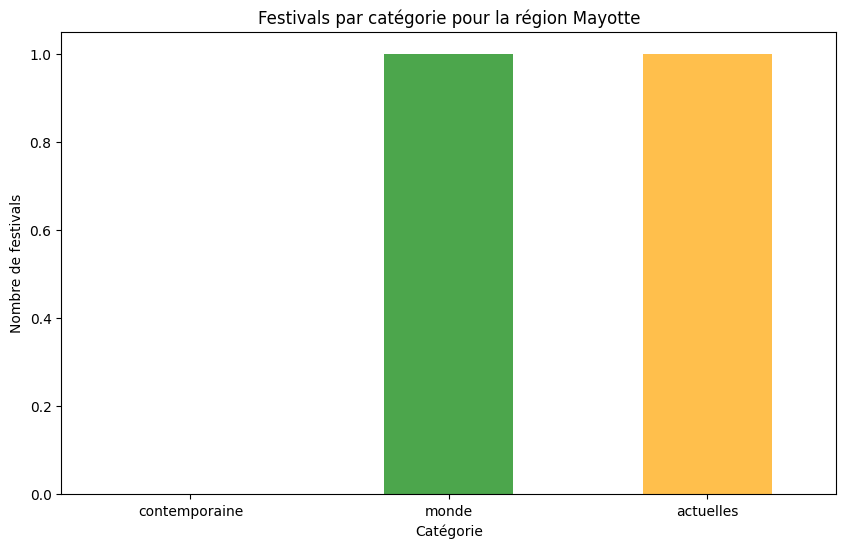

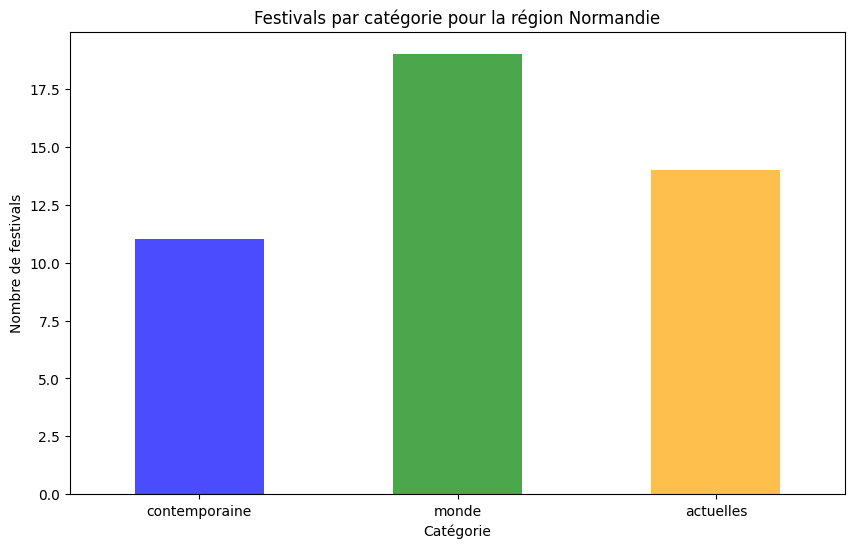

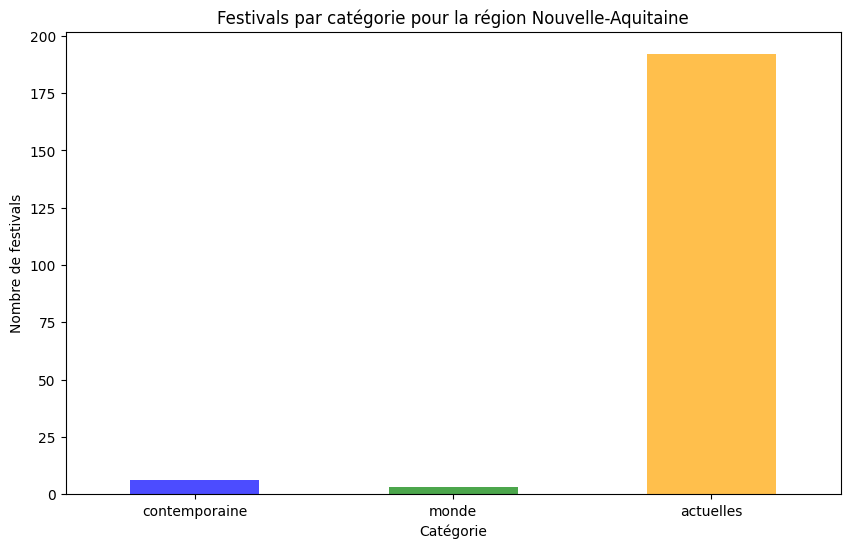

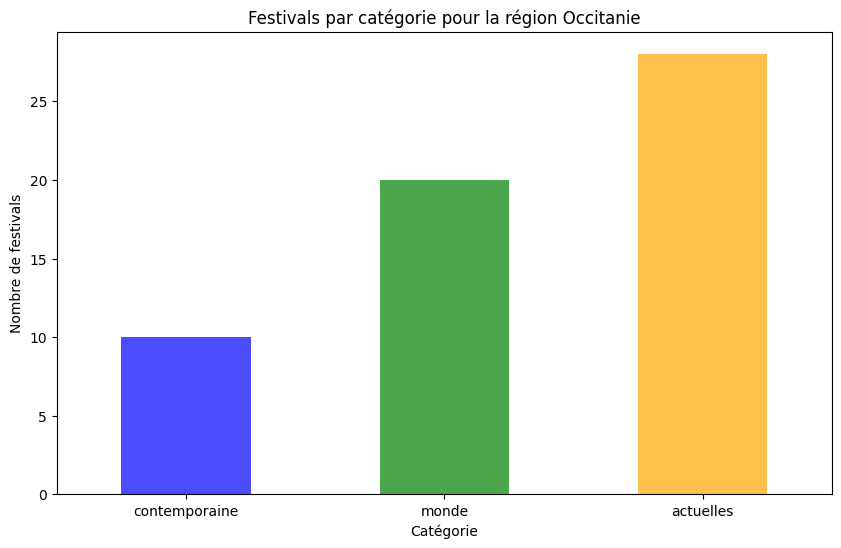

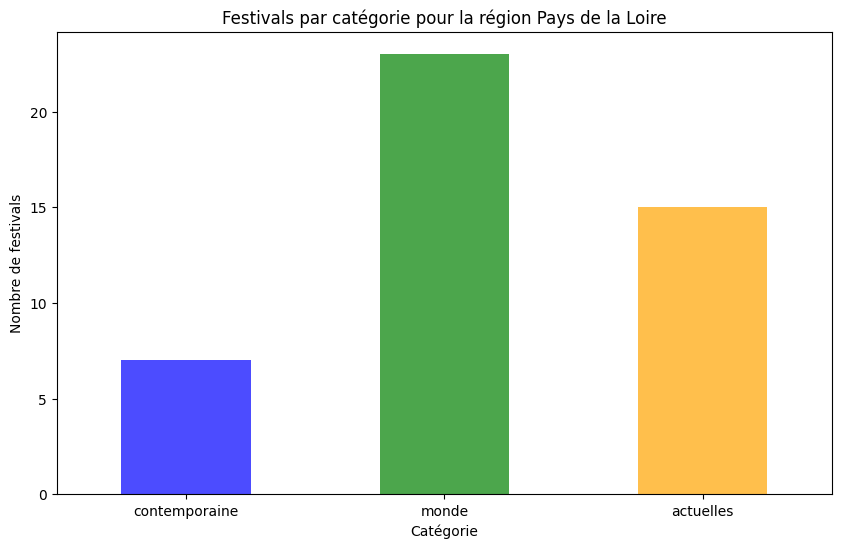

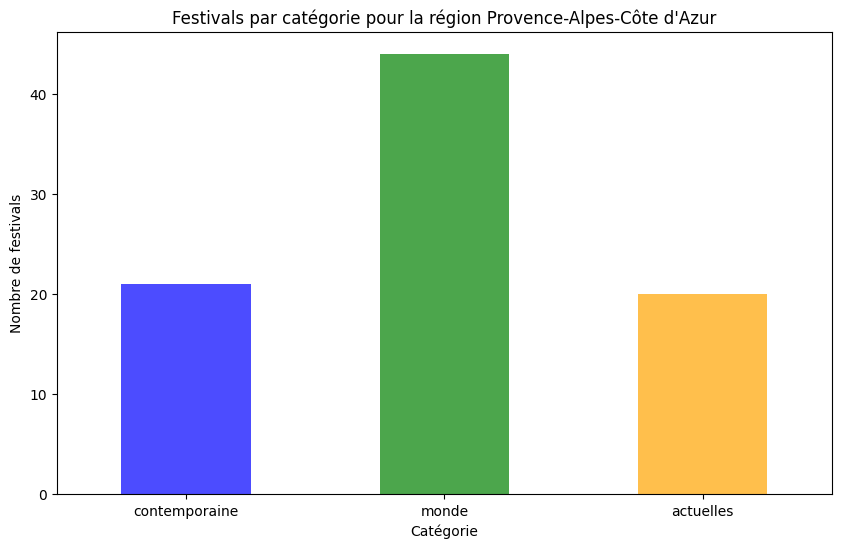

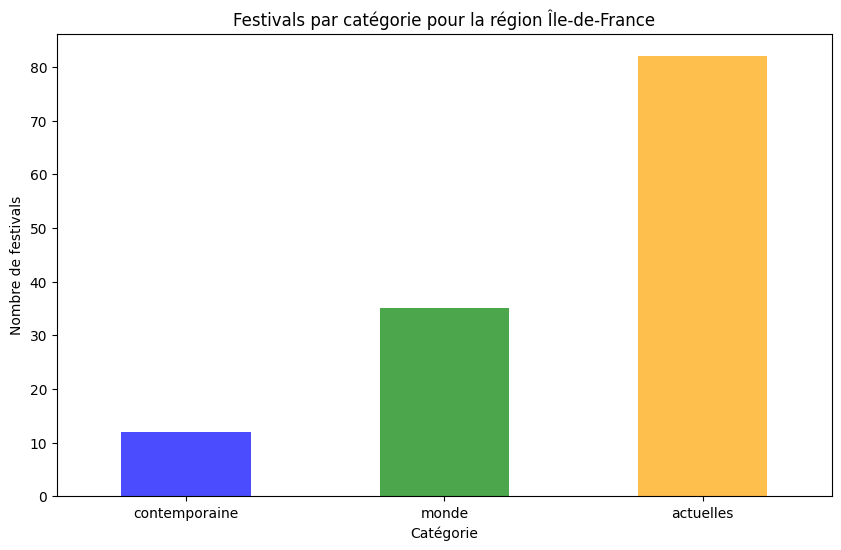

In [ ]:
def plot_festivals_par_categorie(df):
    # Créer une colonne 'categorie' indiquant si la sous-categorie contient les mots spécifiés
    df['contemporaine'] = df.apply(
        lambda row: 1 if (isinstance(row['sous_categorie_musique'], str) and 'contemporaine' in row['sous_categorie_musique'].lower())
                       or (isinstance(row['sous_categorie_musique_cnm'], str) and 'contemporaine' in row['sous_categorie_musique_cnm'].lower())
                       else 0, axis=1
    )

    df['monde'] = df.apply(
        lambda row: 1 if (isinstance(row['sous_categorie_musique'], str) and 'monde' in row['sous_categorie_musique'].lower())
                       or (isinstance(row['sous_categorie_musique_cnm'], str) and 'monde' in row['sous_categorie_musique_cnm'].lower())
                       else 0, axis=1
    )

    df['actuelles'] = df.apply(
        lambda row: 1 if (isinstance(row['sous_categorie_musique'], str) and 'actuelles' in row['sous_categorie_musique'].lower())
                       or (isinstance(row['sous_categorie_musique_cnm'], str) and 'actuelles' in row['sous_categorie_musique_cnm'].lower())
                       else 0, axis=1
    )

    # Couleurs différentes pour chaque catégorie
    colors = {'contemporaine': 'blue', 'monde': 'green', 'actuelles': 'orange'}

    # Créer un graphique en barres pour chaque région
    for region, data in df.groupby('region_principale_de_deroulement'):
        plt.figure(figsize=(10, 6))
        data[['contemporaine', 'monde', 'actuelles']].sum().plot(kind='bar', alpha=0.7, color=[colors[col] for col in ['contemporaine', 'monde', 'actuelles']])
        plt.title(f"Festivals par catégorie pour la région {region}")
        plt.xlabel('Catégorie')
        plt.ylabel('Nombre de festivals')
        plt.xticks(rotation=0)  # Pour éviter que les noms soient tronqués
        plt.show()

# Utiliser la fonction avec votre DataFrame df_filtres_par_region
plot_festivals_par_categorie(df_filtres_par_region)


In [ ]:
# Exporter le DataFrame df_filtres_par_region vers un fichier CSV lisible par Excel
df_filtres_par_region.to_csv('festival_data.csv', index=False, encoding='utf-8-sig')


df_filtres_par_region.to_csv contient des informations propres et organisées par région des festivals de musiques du monde, actuelle et contemporaine à savoir :


- nom_du_festival

- annee_de_creation_du_festival

- site_internet_du_festival

- sous_categorie_musique

- sous_categorie_musique_cnm
